In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

# Original Waypoint File 

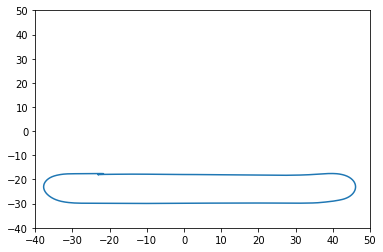

In [2]:
d = pd.read_csv("./xy_translate.csv", header=None)
plt.xlim(-40, 50)
plt.ylim(-40, 50)
plt.plot(d[0], d[1])

# Try 1

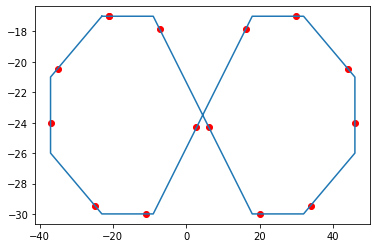

In [3]:
xs = [-23, -9, 4.5, 18, 32, 46, 46, 32, 18, 4.5, -9, -23, -37, -37, -23]
ys = [-17, -17, -23.5, -30, -30, -26, -21, -17,-17, -23.5, -30, -30, -26, -21, -17]
orients = [90, 114, 114, 90, 74, 0, 286, 270, 246, 246, 270, 286, 0, 74, 90]

eightD = pd.DataFrame({"x": xs, "y":ys, "orient":orients})

eightD.index = eightD.index*100

L = 2.0
eightD["nx"] = eightD["x"] + L*np.sin(np.radians(eightD["orient"]))
eightD["ny"] = eightD["y"] + L*np.cos(np.radians(eightD["orient"]))

d = pd.DataFrame(index=list(range(0,1401))).join(eightD[["x", "y", "orient"]]).sort_index().interpolate()
d.to_csv("eightwp.csv", header=None, index=False)

plt.plot(eightD["x"], eightD["y"])
plt.scatter(eightD["nx"], eightD["ny"], c="red")

# Try-2 Diamond 

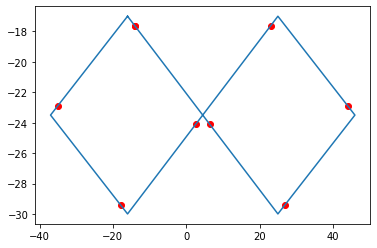

In [4]:
xs = [-16, 4.5, 25, 46, 25, 4.5, -16, -37, -16]
ys = [-17, -23.5, -30, -23.5, -17, -23.5, -30, -23.5, -17]
orients = [108, 108, 73, 287, 252, 252, 287, 73, 108]

eightD = pd.DataFrame({"x": xs, "y":ys, "orient":orients})

eightD.index = eightD.index*100

L = 2.0
eightD["nx"] = eightD["x"] + L*np.sin(np.radians(eightD["orient"]))
eightD["ny"] = eightD["y"] + L*np.cos(np.radians(eightD["orient"]))

d = pd.DataFrame(index=list(range(0,1401))).join(eightD[["x", "y", "orient"]]).sort_index().interpolate()
d.to_csv("diamondwp.csv", header=None, index=False)

plt.plot(eightD["x"], eightD["y"])
plt.scatter(eightD["nx"], eightD["ny"], c="red")

# Try 3 - 2 Circles

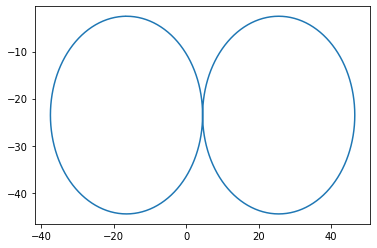

In [5]:
c1 = (25.5, -23.5)
c2 = (-16.5, -23.5)
r = 21

d1 = pd.DataFrame({"angle":list(range(90))})
d1['x'] = c2[0] + r * np.sin(np.radians(d1.angle))
d1['y'] = c2[1] + r * np.cos(np.radians(d1.angle))


d2 = pd.DataFrame({"angle":list(range(270, -90, -1))})
d2['x'] = c1[0] + r * np.sin(np.radians(d2.angle))
d2['y'] = c1[1] + r * np.cos(np.radians(d2.angle))

d3 = pd.DataFrame({"angle":list(range(90, 360))})
d3['x'] = c2[0] + r * np.sin(np.radians(d3.angle))
d3['y'] = c2[1] + r * np.cos(np.radians(d3.angle))

df = pd.concat([d1, d2, d3], axis=0).reset_index(drop=True)

dfs = pd.concat([df, df[0:1]], axis=0).reset_index(drop=True)
df['dx'] = dfs['x'].values[1:] - dfs['x'].values[:-1]
df['dy'] = dfs['y'].values[1:] - dfs['y'].values[:-1]

df["orient"] = ((np.arctan2(df['dx'], df['dy']) * 180 / np.pi).values + 360.0)%360.0

df[["x", "y", "orient"]].to_csv("circle8.csv", header=None, index=False)

plt.plot(df["x"], df["y"])

# The shape that worked 

In [6]:
c1 = (39.25, -23.25)
c2 = (11.25, -23.25)
c3 = (-2.25, -23.25)
c4 = (-30.25, -23.25)

r = 6.75

points_in_each_segment = 100

d1 = pd.DataFrame({"x": np.linspace(-30.25,-2.25, points_in_each_segment), "y":-16.5})
d4 = pd.DataFrame({"x": np.linspace(11.25,39.25, points_in_each_segment), "y":-30.0})
d6 = pd.DataFrame({"x": np.linspace(39.25,11.25, points_in_each_segment), "y":-16.5})
d9 = pd.DataFrame({"x": np.linspace(-2.25,-30.25, points_in_each_segment), "y":-30.0})


angles = np.linspace(0,np.pi/2,points_in_each_segment)
d2 = pd.DataFrame()
d2['x'] = c3[0] + r * np.sin(angles)
d2['y'] = c3[1] + r * np.cos(angles)

angles = np.linspace(3*np.pi/2,np.pi,points_in_each_segment)
d3 = pd.DataFrame()
d3['x'] = c2[0] + r * np.sin(angles)
d3['y'] = c2[1] + r * np.cos(angles)

angles = np.linspace(np.pi, 0.0, points_in_each_segment)
d5 = pd.DataFrame()
d5['x'] = c1[0] + r * np.sin(angles)
d5['y'] = c1[1] + r * np.cos(angles)

angles = np.linspace(2*np.pi, 3*np.pi/2,points_in_each_segment)
d7 = pd.DataFrame()
d7['x'] = c2[0] + r * np.sin(angles)
d7['y'] = c2[1] + r * np.cos(angles)

angles = np.linspace(np.pi/2, np.pi, points_in_each_segment)
d8 = pd.DataFrame()
d8['x'] = c3[0] + r * np.sin(angles)
d8['y'] = c3[1] + r * np.cos(angles)

angles = np.linspace(np.pi, 2*np.pi, points_in_each_segment)
d10 = pd.DataFrame()
d10['x'] = c4[0] + r * np.sin(angles)
d10['y'] = c4[1] + r * np.cos(angles)



df = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10], axis=0).reset_index(drop=True)

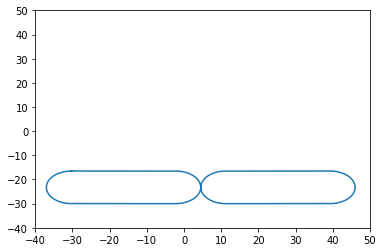

In [7]:
plt.xlim(-40, 50)
plt.ylim(-40, 50)
plt.plot(df["x"], df["y"])

In [8]:
dfs = pd.concat([df, df[0:1]], axis=0).reset_index(drop=True)
df['dx'] = dfs['x'].values[1:] - dfs['x'].values[:-1]
df['dy'] = dfs['y'].values[1:] - dfs['y'].values[:-1]

df["orient"] = ((np.arctan2(df['dx'], df['dy']) * 180 / np.pi).values + 360.0)%360.0

df[["x", "y", "orient"]].to_csv("oval.csv", header=None, index=False)

In [9]:
df

,x,y,dx,dy,orient
0,-30.250000,-16.500000,0.282828,0.000000,90.000000
1,-29.967172,-16.500000,0.282828,0.000000,90.000000
2,-29.684343,-16.500000,0.282828,0.000000,90.000000
3,-29.401515,-16.500000,0.282828,0.000000,90.000000
4,-29.118687,-16.500000,0.282828,0.000000,90.000000
...,...,...,...,...,...
995,-31.104499,-16.554305,0.212871,0.023740,83.636364
996,-30.891628,-16.530565,0.213517,0.016975,85.454545
997,-30.678111,-16.513590,0.213948,0.010192,87.272727
998,-30.464164,-16.503398,0.214164,0.003398,89.090909
